# PCA with Logistic Regression

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.


The MNIST database of handwritten digits is available on the following website: MNIST Dataset

In [6]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

## Download and Load the Data¶

Download the data from the link:

https://github.com/amplab/datascience-sp14/blob/master/lab7/mldata/mnist-original.mat

In [2]:
import scipy.io
mnist = scipy.io.loadmat('C:\\Users\\Owner\\Downloads\\College\\CPSC\\sem_04\\mnist-original.mat')

In [3]:
# These are the images
mnist['data'].shape

(784, 70000)

In [22]:
mnist['label']

array([[0., 0., 0., ..., 9., 9., 9.]])

In [7]:
mnist_data = np.transpose(mnist['data'])
mnist_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
# These are the labels
mnist_label = np.transpose(mnist['label'])
mnist_label

array([[0.],
       [0.],
       [0.],
       ...,
       [9.],
       [9.],
       [9.]])

In [24]:
print(mnist_data.shape,' ',mnist_label.shape)

(70000, 784)   (70000, 1)


In [25]:
mnist_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

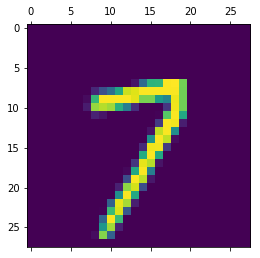

In [38]:
#for val in mnist_data[5]:
 #   pixel = val.reshape(28,28)
  #  plt.matshow(pixel)
    
plt.matshow(mnist_data[68000].reshape(28,28))

## Splitting Data into Training and Test Sets

In [40]:
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist_data, mnist_label, test_size=(1/7.0), random_state=0)

In [41]:
print(train_img.shape)
print(train_lbl.shape)
print(test_img.shape)
print(test_lbl.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


## Standardizing the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## PCA to Speed up Classification Algorithms (Logistic Regression)

#### Step 0: Import and use PCA. After PCA you can apply a learning algorithm of your choice to the transformed data

In [43]:
from sklearn.decomposition import PCA

# Make an instance of the Model

pca = PCA(.95)

Fit PCA on training set. Note: you are fitting PCA on the training set only


In [44]:
pca.fit(train_img)


PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
pca.n_components_

330

Apply the mapping (transform) to both the training set and the test set.

In [46]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

#### Step 1: Import the model you want to use

In [47]:
from sklearn.linear_model import LogisticRegression
# parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
logisticRegr = LogisticRegression(solver = 'lbfgs')

#### Step 3: Training the model on the data, storing the information learned from the data

In [48]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: Convergen

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
test_img[0]

array([-7.19629663e+00, -2.47009935e+00,  3.78176536e+00,  1.15564634e+00,
        6.04803105e+00,  6.33886886e-01,  2.20555116e+00, -3.44946247e+00,
        1.53824059e+00, -2.31504359e+00, -2.05854994e+00,  2.09543799e+00,
        1.05084455e-01, -3.90567115e+00, -1.56880567e+00,  1.08064936e+00,
       -4.15254795e-01,  1.32854801e+00, -6.47158784e-01, -4.48541530e-01,
       -1.95222216e+00, -6.41021778e-01,  1.07359302e+00, -7.83768345e-01,
       -5.60844952e-01,  1.11019197e+00, -1.75083103e+00,  6.60730898e-01,
        1.15653856e+00,  4.54276513e-01,  4.97826840e-01, -3.70694521e-01,
       -9.73318134e-01, -1.80974515e+00,  1.76989339e-01,  8.97012813e-01,
       -8.76820063e-01, -4.69191712e-01, -5.97901589e-01, -1.23109405e-01,
       -7.13657046e-01,  5.30181011e-01, -1.73105380e-01,  2.51795402e-01,
       -3.22432709e-01,  2.04992082e-01,  4.09875301e-02,  1.25655790e-01,
       -5.55903756e-02,  8.46557343e-01,  4.87791417e-01, -1.25966892e-01,
        4.39460998e-01, -

In [54]:
test_img[0].reshape(1,-1)

array([[-7.19629663e+00, -2.47009935e+00,  3.78176536e+00,
         1.15564634e+00,  6.04803105e+00,  6.33886886e-01,
         2.20555116e+00, -3.44946247e+00,  1.53824059e+00,
        -2.31504359e+00, -2.05854994e+00,  2.09543799e+00,
         1.05084455e-01, -3.90567115e+00, -1.56880567e+00,
         1.08064936e+00, -4.15254795e-01,  1.32854801e+00,
        -6.47158784e-01, -4.48541530e-01, -1.95222216e+00,
        -6.41021778e-01,  1.07359302e+00, -7.83768345e-01,
        -5.60844952e-01,  1.11019197e+00, -1.75083103e+00,
         6.60730898e-01,  1.15653856e+00,  4.54276513e-01,
         4.97826840e-01, -3.70694521e-01, -9.73318134e-01,
        -1.80974515e+00,  1.76989339e-01,  8.97012813e-01,
        -8.76820063e-01, -4.69191712e-01, -5.97901589e-01,
        -1.23109405e-01, -7.13657046e-01,  5.30181011e-01,
        -1.73105380e-01,  2.51795402e-01, -3.22432709e-01,
         2.04992082e-01,  4.09875301e-02,  1.25655790e-01,
        -5.55903756e-02,  8.46557343e-01,  4.87791417e-0

In [60]:
test_img[4000].reshape(1,-1).shape

(1, 330)

In [61]:
# Predict for One Observation (image)
logisticRegr.predict(test_img[4000].reshape(1,-1))

array([9.])

In [62]:
test_lbl

array([[1.],
       [9.],
       [2.],
       ...,
       [6.],
       [3.],
       [6.]])

In [63]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img)

array([1., 9., 2., ..., 6., 3., 6.])

## Measuring Model Performance

In [59]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.92
